<a href="https://colab.research.google.com/github/fboldt/aulasml/blob/master/aula13a_aprendizado_n%C3%A3o_supervisionado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

data = load_iris()
X = data.data
y = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

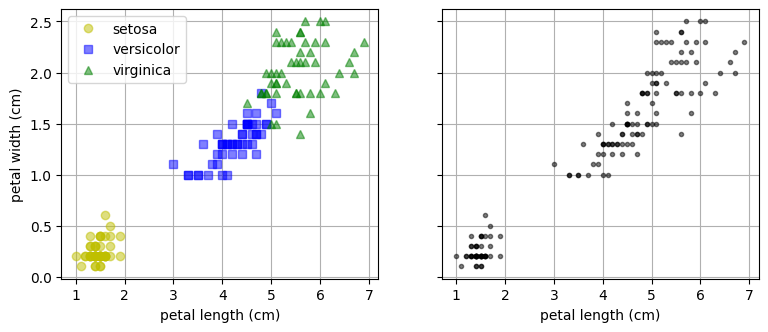

In [ ]:
plt.figure(figsize=(9, 3.5))

plt.subplot(121)
markers = ["yo", "bs", "g^"]
for i, target in enumerate(data.target_names):
  plt.plot(X[y==i, 2], X[y==i, 3], markers[i], label=target, alpha=0.5)
plt.xlabel(data.feature_names[2])
plt.ylabel(data.feature_names[3])
plt.grid()
plt.legend()

plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c="k", marker=".", alpha=0.5)
plt.xlabel(data.feature_names[2])
plt.tick_params(labelleft=False)
plt.gca().set_axisbelow(True)
plt.grid()

plt.show()

In [ ]:
from IPython.lib.security import random
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import numpy as np

blob_centers = np.array([[ 0.2, 2.3], [-1.5, 2.3], [-2.8, 1.8],
                         [-2.8, 2.8], [-2.8, 1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std,
                  random_state=7)

k=5
kmeans = KMeans(n_clusters=k, init="random", n_init='auto', random_state=42)
y_pred = kmeans.fit_predict(X)

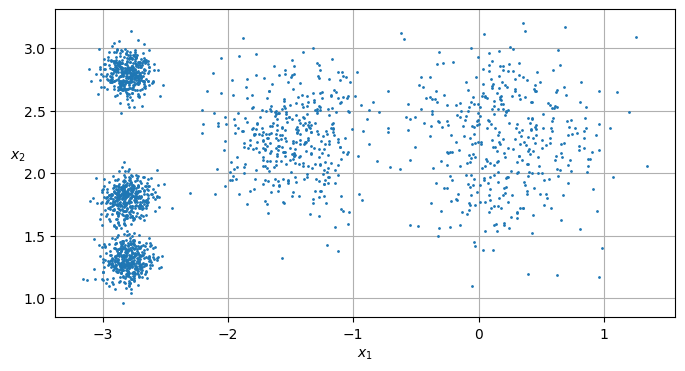

In [ ]:
def plot_clusters(X, y=None):
  plt.scatter(X[:,0], X[:,1], c=y, s=1)
  plt.xlabel("$x_1$")
  plt.ylabel("$x_2$", rotation=0)

plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.gca().set_axisbelow(True)
plt.grid()
plt.show()

In [ ]:
y_pred

array([1, 3, 0, ..., 2, 0, 3], dtype=int32)

In [ ]:
y_pred is kmeans.labels_

True

In [ ]:
kmeans.cluster_centers_

array([[ 0.20876306,  2.25551336],
       [-2.80037642,  1.30082566],
       [-2.79290307,  2.79641063],
       [-2.80389616,  1.80117999],
       [-1.46679593,  2.28585348]])

In [ ]:
blob_centers

array([[ 0.2,  2.3],
       [-1.5,  2.3],
       [-2.8,  1.8],
       [-2.8,  2.8],
       [-2.8,  1.3]])

In [ ]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([0, 0, 2, 2], dtype=int32)

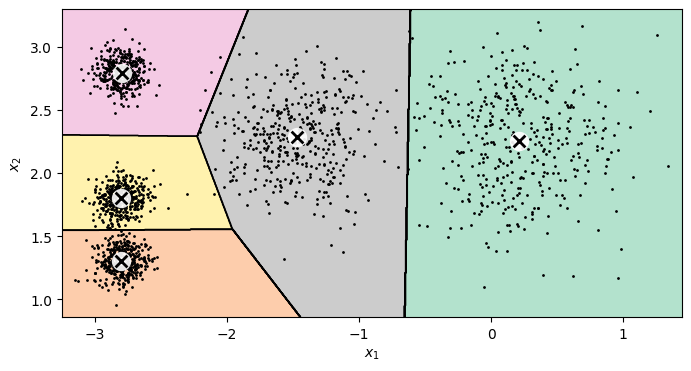

In [ ]:
def plot_data(X):
  plt.plot(X[:,0], X[:,1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
  if weights is not None:
    centroids = centroids[weights > weights.max() / 10]
  plt.scatter(centroids[:, 0], centroids[:, 1],
              marker='o', s=35, linewidths=8,
              color=circle_color, zorder=10, alpha=0.9)
  plt.scatter(centroids[:, 0], centroids[:, 1],
              marker='x', s=2, linewidths=12,
              color=cross_color, zorder=11, alpha=1)

def plot_decision_boudaries(clusterer, X, resolution=1000, show_centroids=True,
                            show_xlabels=True, show_ylabels=True):
  mins = X.min(axis=0) - 0.1
  maxs = X.max(axis=0) + 0.1
  xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                       np.linspace(mins[1], maxs[1], resolution))
  Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
               cmap="Pastel2")
  plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
              linewidths=1, colors='k')
  plot_data(X)
  if show_centroids:
    plot_centroids(clusterer.cluster_centers_)

  if show_xlabels:
    plt.xlabel("$x_1$")
  else:
    plt.tick_params(labelbottom=False)
  if show_ylabels:
    plt.ylabel("$x_2$")
  else:
    plt.tick_params(labelleft=False)

plt.figure(figsize=(8, 4))
plot_decision_boudaries(kmeans, X)
plt.show()

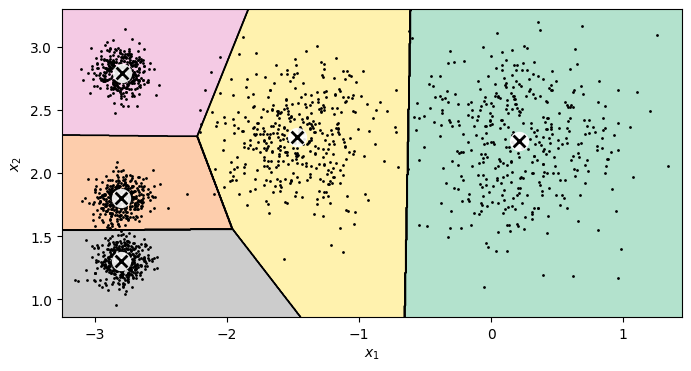

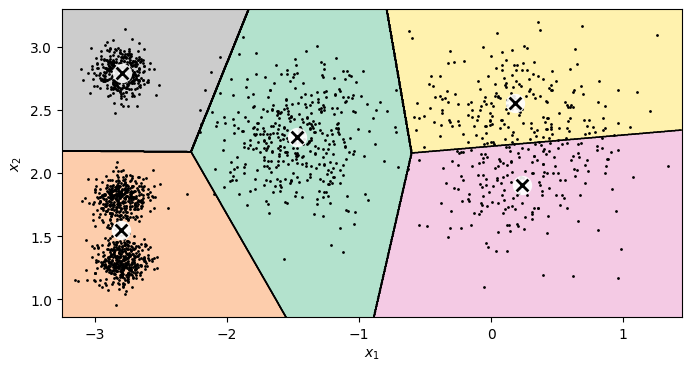

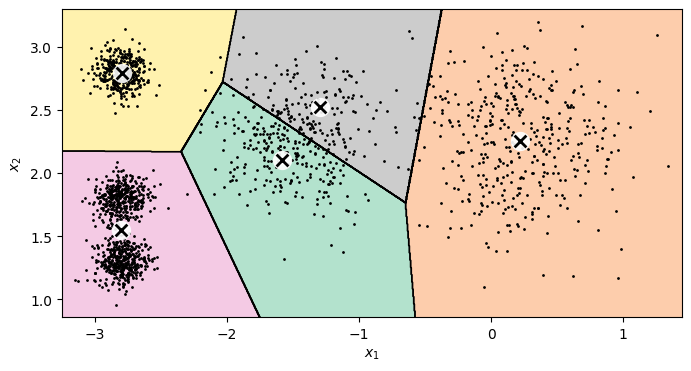

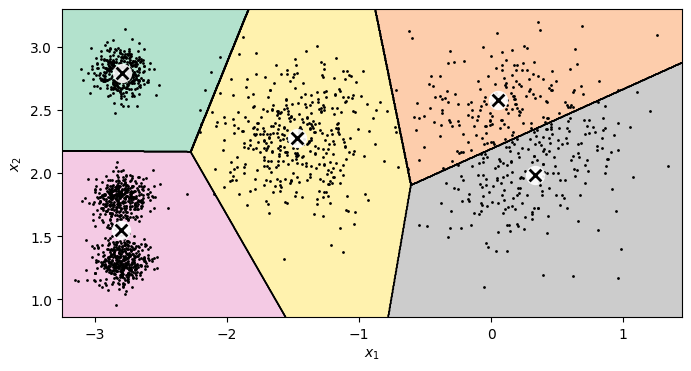

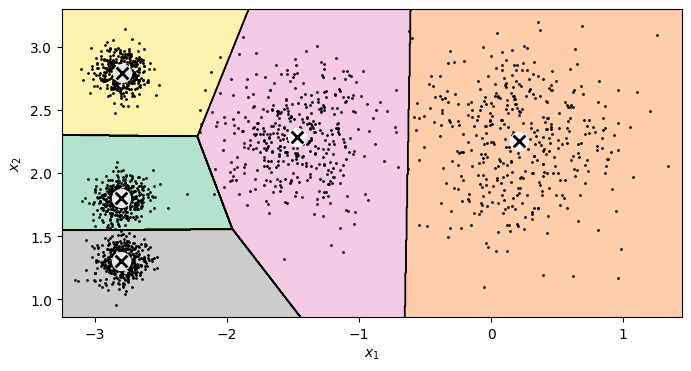

In [ ]:
for _ in range(5):
  plt.figure(figsize=(8, 4))
  plot_decision_boudaries(KMeans(n_clusters=k, init="k-means++", n_init='auto').fit(X),
                          X)
  plt.show()

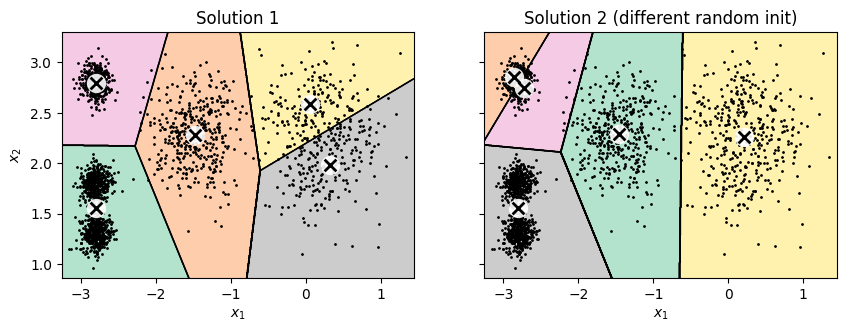

In [ ]:
def plot_cluster_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
  clusterer1.fit(X)
  clusterer2.fit(X)

  plt.figure(figsize=(10, 3.2))

  plt.subplot(121)
  plot_decision_boudaries(clusterer1, X)
  if title1:
    plt.title(title1)

  plt.subplot(122)
  plot_decision_boudaries(clusterer2, X, show_ylabels=False)
  if title2:
    plt.title(title2)

kmeans_rnd_init1 = KMeans(n_clusters=k, init="random", n_init=1, random_state=2)
kmeans_rnd_init2 = KMeans(n_clusters=k, init="random", n_init=1, random_state=9)

plot_cluster_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                        "Solution 1", "Solution 2 (different random init)")
plt.show()

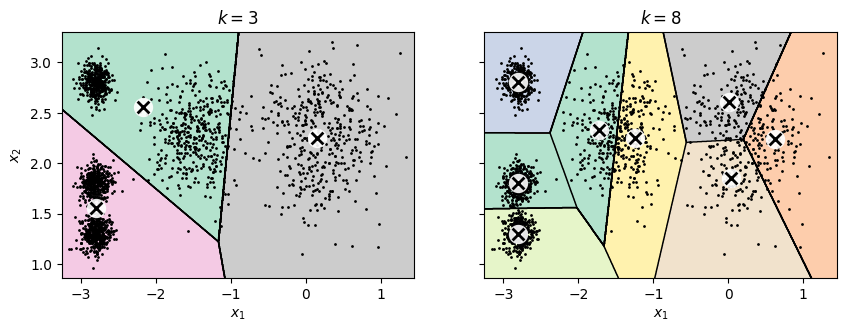

In [ ]:
kmeans_k3 = KMeans(n_clusters=3, n_init='auto', random_state=42)
kmeans_k8 = KMeans(n_clusters=8, n_init='auto', random_state=42)

plot_cluster_comparison(kmeans_k3, kmeans_k8, X, "$k=3$", "$k=8$")
plt.show()

In [ ]:
kmeans_k3.inertia_

653.2573264005191

In [ ]:
kmeans_k8.inertia_

119.6240806663117

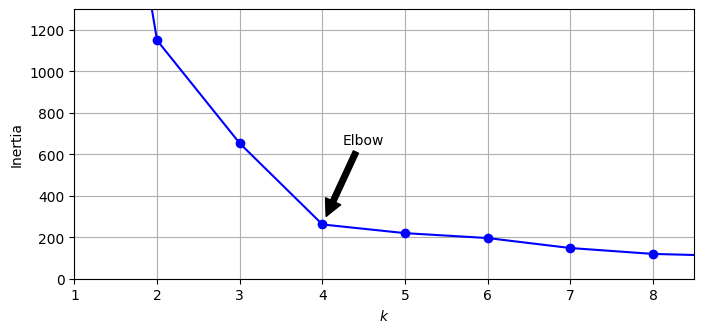

In [ ]:
kmeans_per_k = [KMeans(n_clusters=k, n_init='auto', random_state=42).fit(X)
                for k in range(1,10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.annotate("", xy=(4, inertias[3]), xytext=(4.45, 650),
            arrowprops=dict(facecolor='black', shrink=0.1))
plt.text(4.5, 650, "Elbow", horizontalalignment="center")
plt.axis([1, 8.5, 0, 1300])
plt.grid()
plt.show()

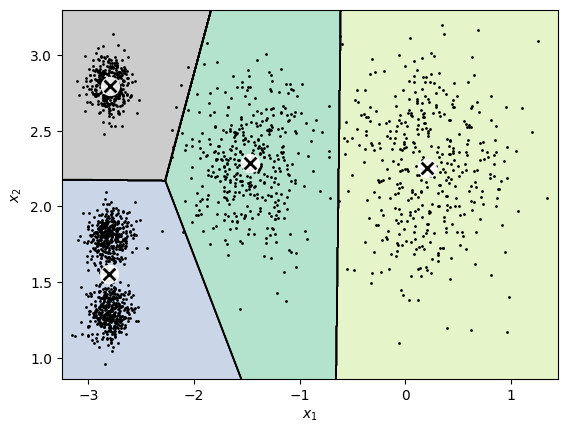

In [ ]:
plot_decision_boudaries(kmeans_per_k[4 -1], X)
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

0.655517642572828

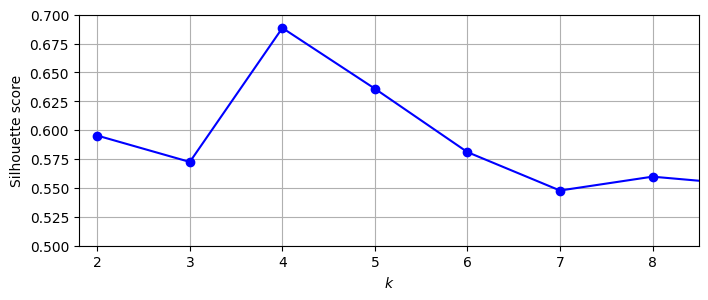

In [ ]:
silhouette_scores = [silhouette_score(X, model.labels_)
                      for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$")
plt.ylabel("Silhouette score")
plt.axis([1.8, 8.5, 0.5, 0.7])
plt.grid()
plt.show()

# Aprendizado semi-supervisionado

In [ ]:
from sklearn.datasets import load_digits

X_digits, y_digits = load_digits(return_X_y=True)
X_train, y_train = X_digits[:1400], y_digits[:1400]
X_test, y_test = X_digits[1400:], y_digits[1400:]

In [ ]:
from sklearn.linear_model import LogisticRegression

n_labeled = 50
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])

LogisticRegression(max_iter=10000)

In [ ]:
log_reg.score(X_test, y_test)

0.7481108312342569

In [ ]:
log_reg_full = LogisticRegression(max_iter=10_000)
log_reg_full.fit(X_train, y_train)
log_reg_full.score(X_test, y_test)

0.906801007556675

In [ ]:
k = 50
kmeans = KMeans(n_clusters=k, n_init="auto", random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digits_idx = X_digits_dist.argmin(axis=0)
X_representative_digits = X_train[representative_digits_idx]

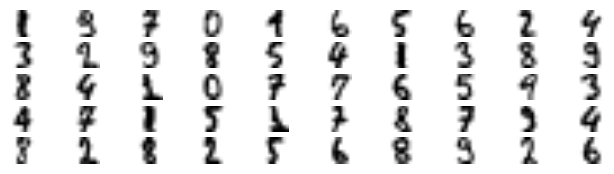

In [ ]:
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
  plt.subplot(k // 10, 10, index + 1)
  plt.imshow(X_representative_digit.reshape(8, 8), cmap='binary',
             interpolation="bilinear")
  plt.axis('off')
plt.show()

In [ ]:
y_representative_digits = np.array([
    1, 9, 7, 0, 1, 6, 5, 6, 2, 4,
    3, 2, 9, 8, 5, 4, 1, 3, 8, 9,
    8, 4, 1, 0, 7, 7, 6, 5, 9, 3,
    4, 7, 1, 5, 1, 7, 8, 7, 9, 4,
    8, 2, 8, 2, 5, 6, 8, 9, 2, 6
])

In [ ]:
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.8639798488664987

In [ ]:
y_train_propagated = np.empty(len(X_train), dtype=np.int64)
for i in range(k):
  y_train_propagated[kmeans.labels_ == i] = y_representative_digits[i]

In [ ]:
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train, y_train_propagated)
log_reg.score(X_test, y_test)

0.8765743073047859

In [ ]:
percentile_closest = 95

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
  in_cluster = (kmeans.labels_ == i)
  cluster_dist = X_cluster_dist[in_cluster]
  cutoff_distance = np.percentile(cluster_dist, percentile_closest)
  above_cutoff = (X_cluster_dist > cutoff_distance)
  X_cluster_dist[in_cluster & above_cutoff] = -1

partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]
print(len(y_train_partially_propagated))
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
log_reg.score(X_test, y_test)

1309


0.8816120906801007

In [ ]:
(y_train_partially_propagated == y_train[partially_propagated]).mean()

0.959511077158136